# SVM 
## From scratch - linear svm - fit - predict - iris dataset.

The SVM (Support Vector Machine) is a supervised machine learning algorithm typically used for binary classification problems. It’s trained by feeding a dataset with labeled examples (xᵢ, yᵢ).

Using this algorithm helps in finding a hyperplane (or decision boundary) which have the following properties:
It creates separation between examples of two classes with a maximum margin
Its equation $(w.x + b = 0)$ yields a value $≥ 1$ for examples from +ve class and $≤-1$ for examples from -ve class

**To find this hyperplane:** We should get the optimal values `w` (weights) and `b` (intercept) which define this hyperplane. The optimal values are found by minimizing a cost function.

In [150]:
import numpy as np  
import pandas as pd  
import statsmodels.api as sm  
from sklearn.preprocessing import MinMaxScaler  
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score, recall_score, average_precision_score
from sklearn.utils import shuffle


In [151]:
data = pd.read_csv('./IRIS.csv')
print(data['species'].unique())
data.head()

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Cost Function
Our objective is to find a hyperplane that separates +ve and -ve examples with the largest margin while keeping the misclassification as low as possible

$$
J(w) = C \sum_{i = 1}^{m}[y^(i) cost_1 (θ^T x^i) + (1-y^(i)) cost_0 (θ^T x^i) ] + \frac{1}{2} \sum_{i = 1}^{n} (θ_i)^2
$$

$$Or$$ 

$$
J(w) = \frac{1}{2} ||w||^2 + C[\frac{1}{m} \sum_{i}^{m} max(0,1-y_i * (w . x_i +b)) ] 
$$

where the functions $cost_1$ and $cost_0$ refer to the cost for an example where y=1 and the cost for an example where y=0 and $C = \frac{1}{λ}$ 

For SVMs, cost is determined by kernel (similarity) functions.

- `Large C` or `Small λ`: Low bias , high variance (narrow margin).

- `Small C` or `Large λ`: high bias, low variance (wider margin).

In [152]:
def compute_cost(W, X, Y):
    # calculate hinge loss
    N = X.shape[0]
    distances = 1 - Y * (np.dot(X, W))
    distances[distances < 0] = 0  # equivalent to max(0, distance)
    hinge_loss = reg_strength * (np.sum(distances) / N)
    
    # calculate cost
    cost = 1 / 2 * np.dot(W, W) + hinge_loss
    return cost

# The Gradient of Cost Function


$$
J(w) = \frac{1}{N} \sum_{i}^{n} [\frac{1}{2} ||w||^2 + C[ max(0,1-y_i * (w . x_i +b)) ] 
$$

\begin{align}
    \text{$ \nabla_{w} $}J(w) = \left\{
    \begin{array}{cl}
    w & max(0,1-y_i * (w . x_i +b)) = 0 \\
    w - C y_i x_i & otherwise.
    \end{array}
    \right.
\end{align}

To find the minimum of J(w), we have to:

- Minimize $ ∣w∣∣^2$ which maximizes `margin` ($2 / ∣∣w∣∣$)
- Minimize the `sum of hinge loss` which minimizes `misclassifications`.


In [153]:
# work for vanilla and mini-batch gradient descent as well
def calculate_cost_gradient(W, X_batch, Y_batch):
    # if only one example is passed (eg. in case of fit)
    # if type(Y_batch) == np.float64:
    Y_batch = np.array([Y_batch])
    X_batch = np.array([X_batch])
    distance = 1 - (Y_batch * np.dot(X_batch, W))
    dw = np.zeros(len(W))

    for ind, d in enumerate(distance):
        if max(0, d) == 0:
            di = W
        else:
            di = W - (reg_strength * Y_batch[ind] * X_batch[ind])
        dw += di
    dw = dw/len(Y_batch)  # average
    return dw

# Minimizing the Cost Function

Gradient descent algorithm works as follows:
- Find the gradient of cost function i.e. $ \nabla J(w)$
- Move opposite to the gradient by a certain rate i.e. $w := w — ∝ (\nabla J(w))$
> Because gradient is the direction of the fastest increase of the function. We need to move opposite to that direction to minimize our function J(w).
- Repeat step 1–2 until convergence i.e we found w where J(w) is smallest


**Stochastic Gradient Descent**
- It is easier to fit into memory due to a single training sample being processed by the network.
- It is computationally fast as only one sample is processed at a time.
- For larger datasets it can converge faster as  it causes updates to the parameters more frequently.

In [154]:
def fit(features, outputs):
  '''
  fit using Stochastic Gradient Descent with stopping criterion that will stop the training 
  when the current cost hasn’t decreased much as compared to the previous cost

  '''
  max_epochs = 5000
  weights = np.zeros(features.shape[1])
  nth = 0
  prev_cost = float("inf")
  cost_threshold = 0.01   
  # stochastic gradient descent
  for epoch in range(1, max_epochs):
      # shuffle to prevent repeating update cycles
      X, Y = shuffle(features, outputs)
      for ind, x in enumerate(X):
          calculated_gradient = calculate_cost_gradient(weights, x, Y[ind])
          weights = weights - (learning_rate * calculated_gradient)
      # convergence check on 2^nth epoch
      if epoch == 2 ** nth or epoch == max_epochs - 1:
          cost = compute_cost(weights, features, outputs)
          print("Epoch is:{} and Cost is: {}".format(epoch, cost))
          # stoppage criterion
          if abs(prev_cost - cost) < cost_threshold * prev_cost:
              return weights
          prev_cost = cost
          nth += 1
  return weights

### set hyper-parameters and call init
### hyper-parameters are normally tuned using `cross-validation` but following work good enough.

In [155]:
reg_strength = 1000 # regularization strength
learning_rate = 0.001

In [156]:
def predict(X_test, W):
    y_test_predicted = np.array([])
    for i in range(X_test.shape[0]):
        yp = np.sign(np.dot(W, X_test.to_numpy()[i])) #model
        y_test_predicted = np.append(y_test_predicted, yp)

    return y_test_predicted


In [157]:
def SVM():
    data = pd.read_csv('./IRIS.csv')
    data = data.drop(data[data.species == 'Iris-versicolor'].index)
    # SVM only accepts numerical values. 
    # Therefore, we will transform the categories M and B into
    # values 1 and -1 (or -1 and 1), respectively.
    species_map = {'Iris-setosa':1, 'Iris-virginica':-1}

    # ['Iris-setosa' 'Iris-virginica']
    data['species'] = data['species'].map(species_map)

    # # drop last column and unnecessary first column (id)
    # data.drop(data[''], axis=1, inplace=True)
    
    # put features X & outputs Y in different DataFrames for convenience
    Y = data.loc[:, 'species']  # all rows of 'species' 
    X = data.iloc[:, 1:]  # all rows of column 1 and ahead (features)
    # normalize the features using MinMaxScalar from
    # sklearn.preprocessing
    X_normalized = MinMaxScaler().fit_transform(X.values)
    X = pd.DataFrame(X_normalized)

    # first insert 1 in every row for intercept b
    X.insert(loc=len(X.columns), column='intercept', value=1)


    # test_size is the portion of data that will go into test set
    # random_state is the seed used by the random number generator
    print("splitting dataset into train and test sets...")
    X_train, X_test, y_train, y_test = tts(X, Y, test_size=0.2, random_state=42)

    # train the model
    print("training started...")
    W = fit(X_train.to_numpy(), y_train.to_numpy())
    print("training finished.")
    print("weights are: {}".format(W))

   
    ## predict and test
    y_test_predicted = predict(X_test, W)
    print("accuracy on test dataset: {}".format(accuracy_score(y_test.to_numpy(), y_test_predicted)))
    print("recall on test dataset: {}".format(recall_score(y_test.to_numpy(), y_test_predicted)))
    print("precision on test dataset: {}".format(average_precision_score(y_test.to_numpy(), y_test_predicted)))  
  


In [158]:
SVM()   
  

splitting dataset into train and test sets...
training started...
Epoch is:1 and Cost is: 3.2474285928935025
Epoch is:2 and Cost is: 2.767054584625065
Epoch is:4 and Cost is: 2.008972346378636
Epoch is:8 and Cost is: 3.4103346980598266
Epoch is:16 and Cost is: 2.7659440063877008
Epoch is:32 and Cost is: 1.8945175700968993
Epoch is:64 and Cost is: 2.21884434650167
Epoch is:128 and Cost is: 4.190454056617619
Epoch is:256 and Cost is: 2.5421082898542675
Epoch is:512 and Cost is: 3.522516193943753
Epoch is:1024 and Cost is: 3.2900572633145386
Epoch is:2048 and Cost is: 1.9485632626442404
Epoch is:4096 and Cost is: 2.342574319630657
Epoch is:4999 and Cost is: 2.283512016580219
training finished.
weights are: [ 0.50993159 -0.90816452 -0.97364857  1.5919279   0.00224514]
accuracy on test dataset: 1.0
recall on test dataset: 1.0
precision on test dataset: 1.0


## plotting two features with the corresponding category show that this iris dataset is a good dataset for using SVM 

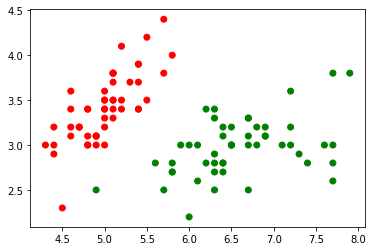

In [159]:
data = data.drop(data[data.species == 'Iris-versicolor'].index)
fig, ax = plt.subplots()

colors = {'Iris-setosa':'red', 'Iris-virginica':'green'}

ax.scatter(data['sepal_length'], data['sepal_width'], c=data['species'].map(colors))

plt.show()
